In [141]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from bs4 import BeautifulSoup
from sklearn.metrics import r2_score
import requests
import dateutil.parser
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

import plotly.express as px

def to_date(datestring):
    date = dateutil.parser.parse(datestring)
    return date

def money_to_int(moneystring):
    moneystring = moneystring.replace('$', '').replace(',', '')
    return int(moneystring)
def money_to_int_null(moneystring):
    if moneystring != '-':
        moneystring = moneystring.replace('$', '').replace(',', '')
    else:
        moneystring = moneystring.replace('-', '0')
    return int(moneystring)
def percent_float(string):
    if string == '-':
        string = string.replace('-', '0')
#     if '<>' in string:
#         string = string.replace('<>', '')
    else:
        string.replace('%<>', '')
    return float(string)
def null_replace(string):
    if string == '-':
        string = string.replace('-', '0')
    return int(string)

In [3]:
all_data = pd.read_csv('Movies_and_CDC_Data.csv')

/Users/alexstake/opt/anaconda3/envs/metis/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (2,10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484115 entries, 0 to 484114
Data columns (total 80 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Date                                    484115 non-null  object 
 1   rank                                    484115 non-null  int64  
 2   rank_yest                               484115 non-null  object 
 3   movie_title                             484115 non-null  object 
 4   daily_gross                             484115 non-null  object 
 5   gross_change_day                        484115 non-null  object 
 6   gross_change_week                       484115 non-null  object 
 7   num_of_theaters                         484115 non-null  object 
 8   avg_gross_per_theater                   484115 non-null  object 
 9   gross_to_date                           484115 non-null  object 
 10  days_in_release                         4841

In [5]:
all_data['daily_gross'] = all_data.daily_gross.apply(money_to_int)

In [6]:
all_data['gross_to_date'] = all_data.gross_to_date.apply(money_to_int)

In [7]:
all_data.head(40)

,Date,rank,rank_yest,movie_title,daily_gross,gross_change_day,gross_change_week,num_of_theaters,avg_gross_per_theater,gross_to_date,...,Series_Complete_Pfizer_18Plus,Series_Complete_Unk_Manuf_18Plus,Series_Complete_Janssen_65Plus,Series_Complete_Moderna_65Plus,Series_Complete_Pfizer_65Plus,Series_Complete_Unk_Manuf_65Plus,Series_Complete_FedLTC,Series_Complete_FedLTC_Residents,Series_Complete_FedLTC_Staff,Series_Complete_FedLTC_Unknown
0,2021-09-22,1,1,Shang-Chi and the Legend of the Ten Rings,1467643,-25.2%,-40.5%,"4,070",$360,181833064,...,1052663,48,22278,269897,251096,9,21221,3505,3522,14194
1,2021-09-22,1,1,Shang-Chi and the Legend of the Ten Rings,1467643,-25.2%,-40.5%,"4,070",$360,181833064,...,398071,208,22772,121310,121462,96,15478,7502,5656,2320
2,2021-09-22,1,1,Shang-Chi and the Legend of the Ten Rings,1467643,-25.2%,-40.5%,"4,070",$360,181833064,...,741516,4,15471,131339,156098,1,21824,8047,7616,6161
3,2021-09-22,1,1,Shang-Chi and the Legend of the Ten Rings,1467643,-25.2%,-40.5%,"4,070",$360,181833064,...,2837203,4275,85659,770432,838271,2189,149663,74156,48994,26513
4,2021-09-22,1,1,Shang-Chi and the Legend of the Ten Rings,1467643,-25.2%,-40.5%,"4,070",$360,181833064,...,394131,41,14191,94227,115338,21,21832,10710,8954,2168
5,2021-09-22,1,1,Shang-Chi and the Legend of the Ten Rings,1467643,-25.2%,-40.5%,"4,070",$360,181833064,...,617942,298,16502,193819,167354,146,22663,11795,5342,5526
6,2021-09-22,1,1,Shang-Chi and the Legend of the Ten Rings,1467643,-25.2%,-40.5%,"4,070",$360,181833064,...,119,1,1024,2085,7,0,62,0,62,0
7,2021-09-22,1,1,Shang-Chi and the Legend of the Ten Rings,1467643,-25.2%,-40.5%,"4,070",$360,181833064,...,5946069,26785,196656,1835579,1721891,16612,175550,90206,51298,34046
8,2021-09-22,1,1,Shang-Chi and the Legend of the Ten Rings,1467643,-25.2%,-40.5%,"4,070",$360,181833064,...,1897379,2825,52408,410229,401379,797,78765,41353,30655,6757
9,2021-09-22,1,1,Shang-Chi and the Legend of the Ten Rings,1467643,-25.2%,-40.5%,"4,070",$360,181833064,...,16146,0,25,1055,1476,0,0,0,0,0


In [8]:
all_data['avg_gross_per_theater'] = all_data.avg_gross_per_theater.apply(money_to_int_null)

In [9]:
all_data['num_of_theaters'] =all_data.num_of_theaters.apply(money_to_int_null)
# all_data.info()
# all_data['days_in_release'] =all_data.days_in_release.astype(int)
# all_data.info()

In [10]:
all_data['days_in_release'] =all_data.days_in_release.apply(null_replace)
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484115 entries, 0 to 484114
Data columns (total 80 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Date                                    484115 non-null  object 
 1   rank                                    484115 non-null  int64  
 2   rank_yest                               484115 non-null  object 
 3   movie_title                             484115 non-null  object 
 4   daily_gross                             484115 non-null  int64  
 5   gross_change_day                        484115 non-null  object 
 6   gross_change_week                       484115 non-null  object 
 7   num_of_theaters                         484115 non-null  int64  
 8   avg_gross_per_theater                   484115 non-null  int64  
 9   gross_to_date                           484115 non-null  int64  
 10  days_in_release                         4841

In [125]:
all_data_no_loc = all_data.drop(columns = 'Location')
combined_vax = all_data_no_loc.loc[:, ['Date', 'MMWR_week', 'movie_title', 'distributor', 'days_in_release', 'daily_gross',
                                       'num_of_theaters', 'avg_gross_per_theater', 
                                       'Series_Complete_Yes', 'Series_Complete_Pop_Pct',
                                       'gross_to_date']]
# all_data_no_loc.head(50)
combined_vax.Date.unique

<bound method Series.unique of 0         2021-09-22
1         2021-09-22
2         2021-09-22
3         2021-09-22
4         2021-09-22
             ...    
484110    2020-12-13
484111    2020-12-13
484112    2020-12-13
484113    2020-12-13
484114    2020-12-13
Name: Date, Length: 484115, dtype: object>

In [126]:

combined_vax = combined_vax.groupby(['movie_title', 'distributor', 'days_in_release', 
                                     'num_of_theaters', 'avg_gross_per_theater', 'gross_to_date'])['Series_Complete_Yes'].sum().reset_index()

# Features = combined_vax.loc[:, ['Date','movie_title','distributor','days_in_release','num_of_theaters','avg_gross_per_theater']]
# Target = combined_vax['gross_to_date']
# X, X_test, y, y_test = train_test_split(Features, Target, test_size=.2, random_state=42)
combined_vax = combined_vax.groupby([ 'movie_title', 'distributor'])['days_in_release', 'gross_to_date', 'Series_Complete_Yes','num_of_theaters'].max().reset_index()
combined_vax.head(50)

/var/folders/ct/v_q82qz551vg3s2wptrzz4cw0000gp/T/ipykernel_25640/1659389632.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  combined_vax = combined_vax.groupby([ 'movie_title', 'distributor'])['days_in_release', 'gross_to_date', 'Series_Complete_Yes','num_of_theaters'].max().reset_index()


,movie_title,distributor,days_in_release,gross_to_date,Series_Complete_Yes,num_of_theaters
0,A Christmas Story2020 Re-release,Warner Bros.,4,35000,0,150
1,A Quiet Place Part II,Paramount Pictures,91,160072261,348756357,3744
2,A Writer's Odyssey,CMC Pictures,90,149810,178322476,117
3,Abominable2021 Re-release,Universal Pictures,14,110000,0,185
4,About Hope,Nova Vento Entertainment,3,10814,0,0
5,After We Collided,Open Road Films (II),72,2386483,0,2
6,Ailey,Neon,49,204513,359356177,88
7,Alien2020 Re-release,Walt Disney Studios Motion Pictures,13,135000,0,505
8,"All Light, Everywhere",Super LTD,24,37266,310174976,19
9,All My Life,Universal Pictures,45,913935,0,965


In [98]:
def is_new_release(string):
    if 'Re-release' in string:
        string = 0
    else:
        string = 1
    return string

In [132]:
combined_vax['is_new_release'] = combined_vax.movie_title.apply(is_new_release)


In [127]:
Features = combined_vax.loc[:, ['days_in_release','num_of_theaters','Series_Complete_Yes']]
Target = combined_vax['gross_to_date']
X, X_test, y, y_test = train_test_split(Features, Target, test_size=.2, random_state=42)

In [128]:
def split_and_validate(X, y):
    '''
    For a set of features and target X, y, perform a 80/20 train/val split, 
    fit and validate a linear regression model, and report results
    '''
    
    # perform train/val split
    X_train, X_val, y_train, y_val = \
        train_test_split(X, y, test_size=0.2, random_state=42)
    
    # fit linear regression to training data
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    
    # score fit model on validation data
    val_score = lr_model.score(X_val, y_val)
    
    # report results
    print('\nValidation R^2 score was:', val_score)
    print('Feature coefficient results: \n')
    for feature, coef in zip(X.columns, lr_model.coef_):
        print(feature, ':', f'{coef:.2f}')



In [129]:
pd.get_dummies(combined_vax['distributor']).head()

,101 Studios,20th Century Studios,54&O Productions,A24,Affirm Films,ArtAffects Entertainment,Atlas Distribution Company,Bleecker Street Media,Blue Fox Entertainment,CMC Pictures,...,The Ashton Times,TriStar Pictures,United Artists,United Artists Releasing,Universal Pictures,Vertical Entertainment,Vision Films,Walt Disney Studios Motion Pictures,Warner Bros.,Zee Studios
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [130]:
# split_and_validate(X, y)
X2 = X.copy()
X2['distributor'] = combined_vax['distributor']

# split_and_validate(pd.get_dummies(X2, drop_first=True), y)

In [210]:
X3 = X2.copy()
X3['is_new_release'] = combined_vax['is_new_release']
lin = LinearRegression()
lin.fit(pd.get_dummies(X3, drop_first=True), y)
# split_and_validate(pd.get_dummies(X3, drop_first=True), y)
lin.score(pd.get_dummies(X3, drop_first=True), y)

0.7103949865128956

In [211]:
X_train, X_val, y_train, y_val = \
        train_test_split(pd.get_dummies(X3,drop_first=True), y, test_size=0.2, random_state=42)
std = StandardScaler()
std.fit(X_train.values)

StandardScaler()

In [154]:
X_tr = std.transform(X_train.values)
X_val = std.transform(X_val.values)

In [155]:
alphavec = 10**np.linspace(-2,2,200)

lasso_model = LassoCV(alphas = alphavec, cv=5)
lasso_model.fit(X_tr, y_train)

/Users/alexstake/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 110960950955552.0, tolerance: 8205603970540.416
  model = cd_fast.enet_coordinate_descent_gram(
/Users/alexstake/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1108765265058640.0, tolerance: 8549692616739.443
  model = cd_fast.enet_coordinate_descent_gram(
/Users/alexstake/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 837398564827856.0, tolerance: 8549692616739.443
  model = cd_fast.enet_coordinate_descent_gram(
/Users/alexs

LassoCV(alphas=array([1.00000000e-02, 1.04737090e-02, 1.09698580e-02, 1.14895100e-02,
       1.20337784e-02, 1.26038293e-02, 1.32008840e-02, 1.38262217e-02,
       1.44811823e-02, 1.51671689e-02, 1.58856513e-02, 1.66381689e-02,
       1.74263339e-02, 1.82518349e-02, 1.91164408e-02, 2.00220037e-02,
       2.09704640e-02, 2.19638537e-02, 2.30043012e-02, 2.40940356e-02,
       2.52353917e-02, 2.64308149e-0...
       3.44896226e+01, 3.61234270e+01, 3.78346262e+01, 3.96268864e+01,
       4.15040476e+01, 4.34701316e+01, 4.55293507e+01, 4.76861170e+01,
       4.99450512e+01, 5.23109931e+01, 5.47890118e+01, 5.73844165e+01,
       6.01027678e+01, 6.29498899e+01, 6.59318827e+01, 6.90551352e+01,
       7.23263390e+01, 7.57525026e+01, 7.93409667e+01, 8.30994195e+01,
       8.70359136e+01, 9.11588830e+01, 9.54771611e+01, 1.00000000e+02]),
        cv=5)

In [158]:
list(zip(X_train.columns, lasso_model.coef_))
lasso_model.score(X_tr, y_train)

0.6964715472498935

In [213]:
lin.fit(X_train, y_train)
lin.score(X_train, y_train)

0.6964715827106592

In [215]:
y_pred_lin = lin.predict(X_train)
mae(y_train, y_pred_lin)

8010208.311180508

In [171]:
y_pred_lass = lasso_model.predict(X_tr)
y_pred_lin = lin.predict(pd.get_dummies(X3, drop_first=True))

In [177]:
ridge_model = RidgeCV(alphas=alphavec, cv=5)
ridge_model.fit(X_tr, y_train)
ridge_model.score(X_tr, y_train)

0.5986227759901785

In [157]:
def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true)) 

In [161]:
mae(y_train, y_pred_lass)

8009903.113164615

In [173]:
mae(y, y_pred_lin)

8402346.823536575

In [217]:
y_pred_lin = lin.predict(X_val)
mae(y_val, y_pred_lin)
lin.score(X_val, y_val)

11023328.451459551

In [205]:
X_te = std.transform(pd.get_dummies(X3,drop_first=True).values)

In [218]:
lin.fit(X_test, y_test)
lin.score(X_test, y_test)

0.6918843924735739

In [219]:
y_pred_test = lin.predict(X_test)
mae(y_test, y_pred_test)

9606285.61836551

In [220]:
list(zip(X_test.columns, lin.coef_))

[('days_in_release', 48613.04507980001),
 ('num_of_theaters', 17369.548179377212),
 ('Series_Complete_Yes', 0.00868357090439531)]

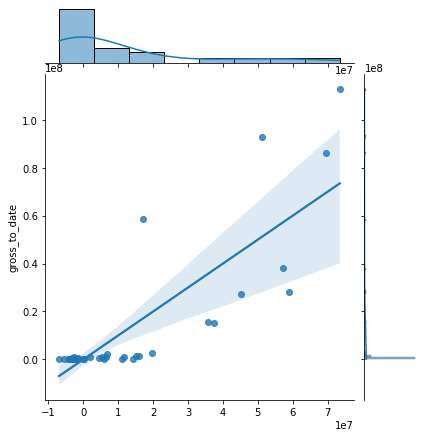

In [221]:
sns.jointplot(x=y_pred_test,y=y_test, kind='reg');

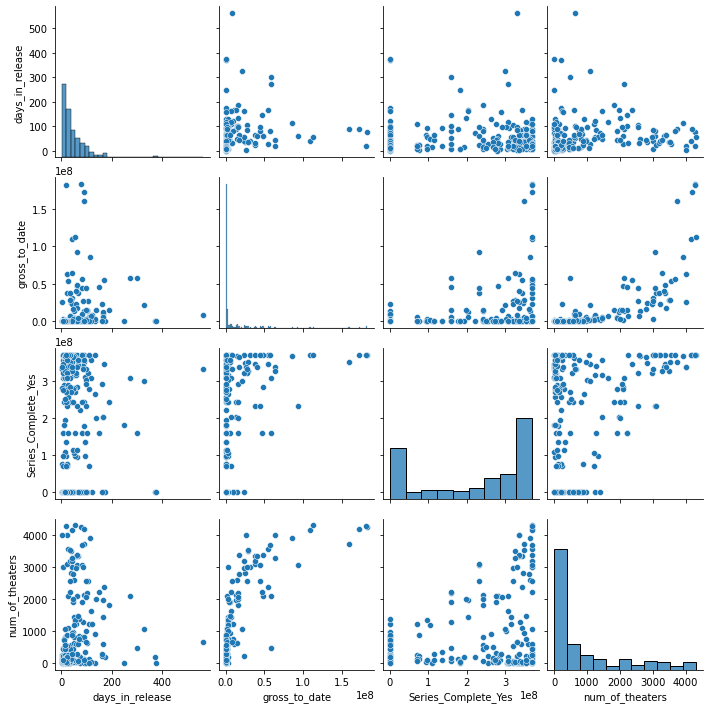

In [92]:
sns.pairplot(combined_vax);